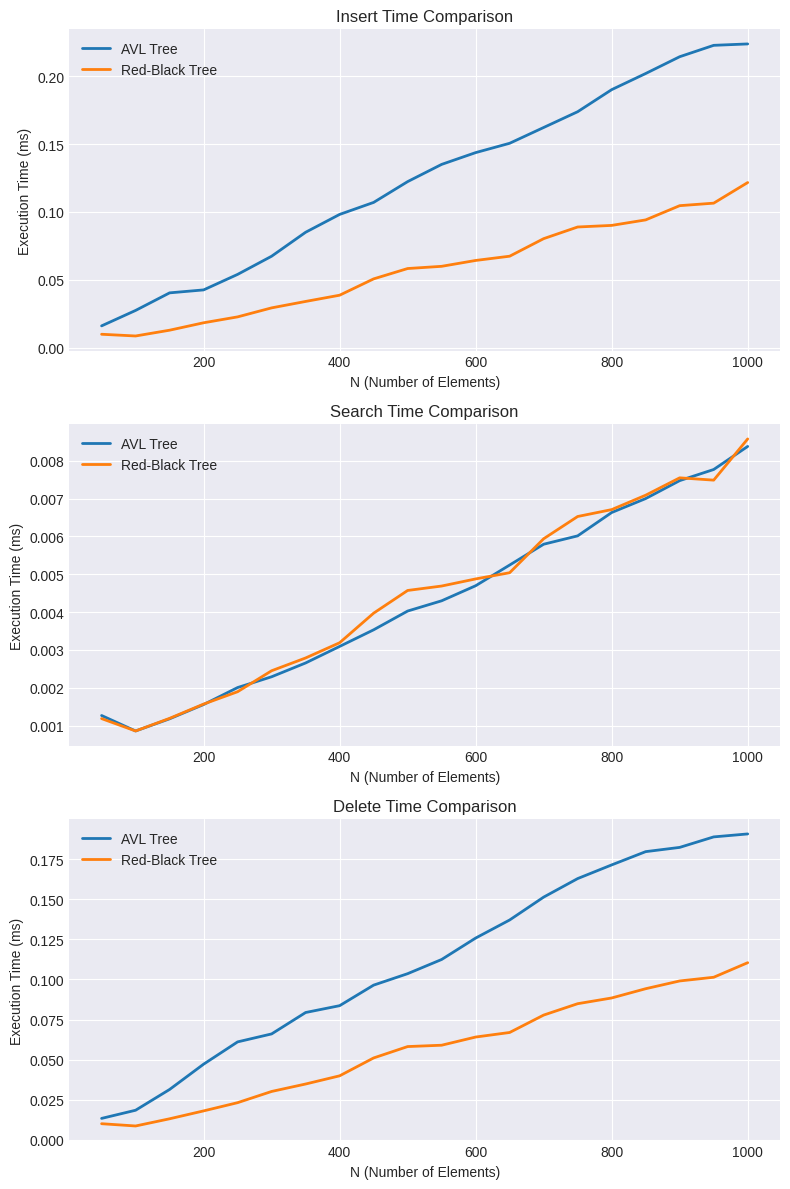

In [37]:
# --- Import libraries ---
import pandas as pd
import matplotlib.pyplot as plt

# --- Read the combined CSV file ---
df = pd.read_csv('final_benchmark_results.csv')

# --- Define operations ---
operations = ['Insert', 'Search', 'Delete']

# --- Plot setup ---
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# --- Loop through operations ---
for i, op in enumerate(operations):
    avl_col = f'AVL_{op}_Time'
    rbt_col = f'RBT_{op}_Time'
    
    axes[i].plot(df['N'], df[avl_col], linewidth=2, label='AVL Tree')
    axes[i].plot(df['N'], df[rbt_col], linewidth=2, label='Red-Black Tree')
    
    axes[i].set_xlabel('N (Number of Elements)')
    axes[i].set_ylabel('Execution Time (ms)')
    axes[i].set_title(f'{op} Time Comparison')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

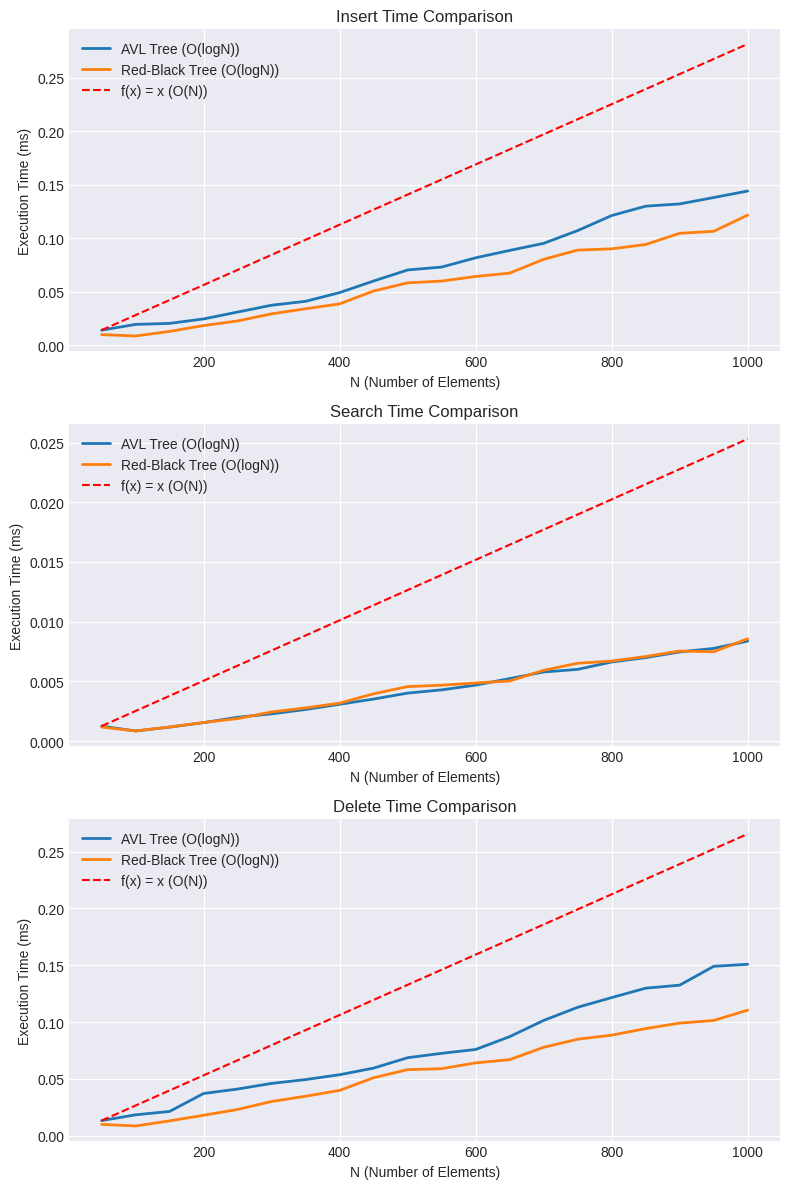

In [52]:
# --- Import libraries ---
import pandas as pd
import matplotlib.pyplot as plt

# --- Read the combined CSV file ---
df = pd.read_csv('final_benchmark_results.csv')

# --- Define operations ---
operations = ['Insert', 'Search', 'Delete']

# --- Plot setup ---
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# --- Loop through operations ---
for i, op in enumerate(operations):
    avl_col = f'AVL_{op}_Time'
    rbt_col = f'RBT_{op}_Time'
    
    # Check if the data columns exist
    if avl_col in df.columns and rbt_col in df.columns:
        # Plot the experimental O(logN) data
        axes[i].plot(df['N'], df[avl_col], linewidth=2, label='AVL Tree (O(logN))')
        axes[i].plot(df['N'], df[rbt_col], linewidth=2, label='Red-Black Tree (O(logN))')
        
        # --- Add a "real" O(N) comparison line ---
        
        # 1. Find the first valid data point to use as an anchor
        #    (We'll use the AVL time as the reference)
        anchor_row_df = df[(df['N'] > 0) & (df[avl_col] > 0)]
        
        if not anchor_row_df.empty:
            anchor_row = anchor_row_df.iloc[0]
            anchor_n = anchor_row['N']
            anchor_time = anchor_row[avl_col]
            
            # 2. Calculate the constant 'c' for y = c*x
            c = anchor_time / anchor_n
            
            # 3. Generate the O(N) data series
            linear_time = c * df['N']
            
            # 4. Plot the anchored O(N) line
            axes[i].plot(df['N'], linear_time, linestyle='--', color='red', label=f'f(x) = x (O(N))')
        
        # --- End of O(N) line code ---

        axes[i].set_xlabel('N (Number of Elements)')
        axes[i].set_ylabel('Execution Time (ms)')
        axes[i].set_title(f'{op} Time Comparison')
        axes[i].legend()
        axes[i].grid(True)
    
    else:
        # Handle cases where data for an operation is missing
        axes[i].text(0.5, 0.5, f'Data for {op} not found', 
                     horizontalalignment='center', verticalalignment='center')
        axes[i].set_title(f'{op} Time Comparison')

plt.tight_layout()
plt.savefig('../figures/performance_graph.png')